Import libraries

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk


Importing dataset

In [72]:
dataset = pd.read_csv('spam.csv', encoding='latin1')
dataset.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Dropping an unnecessary column and giving the head a proper name

In [73]:
dataset=dataset.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)
dataset=dataset.rename(columns={"v1":"label","v2":"text"})
dataset.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Explore the data

In [74]:
print("no of rows", len(dataset))

no of rows 5572


In [75]:
dataset.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [76]:
dataset.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [77]:
dataset['length']=dataset['text'].apply(len)
dataset.head()

,label,text,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Ploting the dataset

<Axes: ylabel='Frequency'>

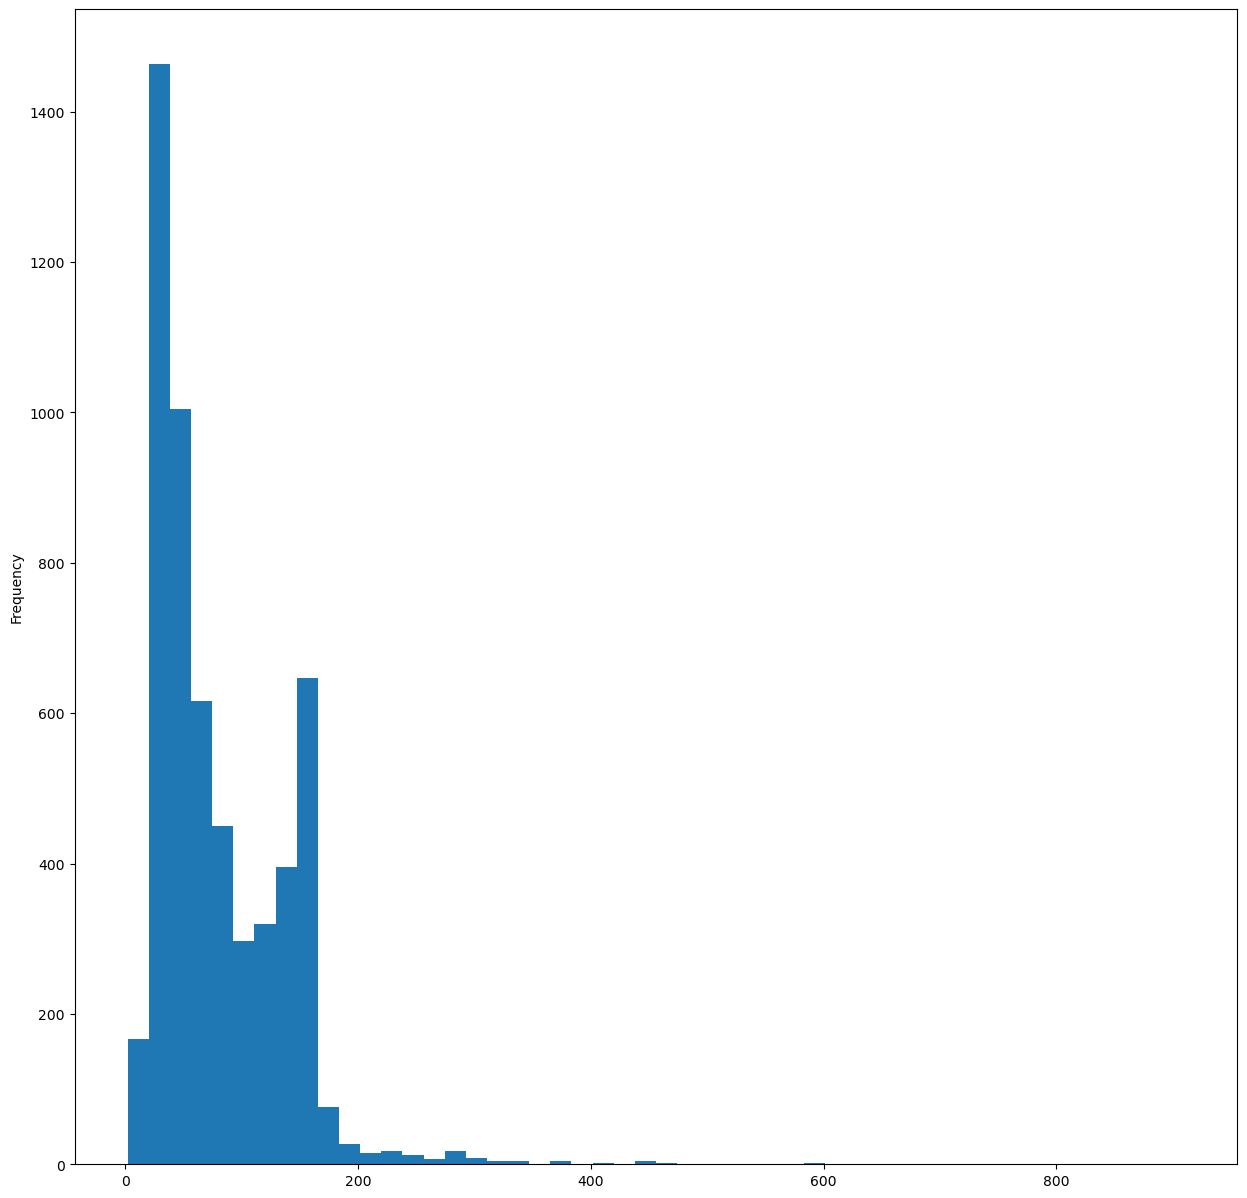

In [78]:
dataset['length'].plot(bins=50, kind='hist',figsize=(15,15))

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

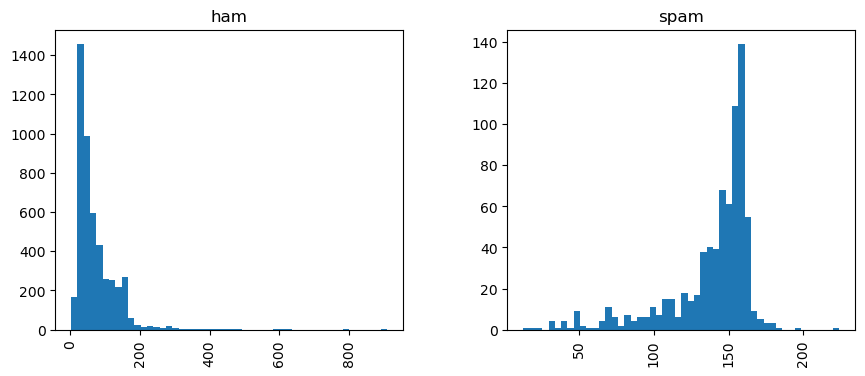

In [79]:
dataset.hist(column='length',by= 'label', bins=50, figsize=(10,4))

In [80]:
dataset.loc[:,'label']=dataset.label.map({'ham':0, 'spam':1})
dataset.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_12136\3505941142.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.loc[:,'label']=dataset.label.map({'ham':0, 'spam':1})


,label,text,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


Implementing Bag of World

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
count=CountVectorizer()
text=count.fit_transform(dataset['text'])
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['label'], test_size=0.2, random_state=42)

In [93]:
text

<5572x8672 sparse matrix of type '<class 'numpy.int64'>'
	with 73916 stored elements in Compressed Sparse Row format>

In [83]:
# Fit and transform the training set
X_train_vectorized = count.fit_transform(X_train)

# Transform the testing set using the same vectorizer
X_test_vectorized = count.transform(X_test)


In [84]:
X_train

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: text, Length: 4457, dtype: object

In [85]:
X_test

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
                              ...                        
4264     &lt;DECIMAL&gt; m but its not a common car he...
2439    Rightio. 11.48 it is then. Well arent we all u...
5556    Yes i have. So that's why u texted. Pshew...mi...
4205                               Get the door, I'm here
4293    Kit Strip - you have been billed 150p. Netcoll...
Name: text, Length: 1115, dtype: object

Implementaing of ML Modle

In [88]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

In [94]:
prediction=classifier.predict(X_test_vectorized)
print(prediction)

[0 0 1 ... 0 0 1]


In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, prediction)
preci_score=precision_score (y_test, prediction)
recall=recall_score(y_test, prediction)
conf_matrix = confusion_matrix(y_test, prediction)
classification_rep = classification_report(y_test, prediction)

In [102]:
print(f'Accuracy: {accuracy}')
print(f'Precision Score:\n {preci_score}')
print(f'Recall Score:\n {recall}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9838565022421525
Precision Score:
 0.9852941176470589
Recall Score:
 0.8933333333333333
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115

